In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
import squidpy as sq
import matplotlib.pyplot as plt
import scanpy as sc

import sys
sys.path.append('../')
# will be available on pip

from STHD import sthdio
from STHD import train
from STHD import color_palette
from STHD import config
from STHD import binning_fast
from STHD import binning

/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


### Fast binning guided by STHD predicted cell type

In [2]:
patch_path = '../testdata/crop10'
sthdata = train.load_data_with_pdata(file_path=patch_path)

/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[log] Number of spots:  22336
[Log] Loading prediction into sthdata.adata.obs, overwriting
Index([], dtype='object')


In [3]:
%%time
binadata = binning_fast.get_sthd_guided_bin_adata(sthdata, pred_col = 'STHD_pred_ct', nspot = 4 )


100%|██████████| 22336/22336 [00:00<00:00, 996775.87it/s]


[LOG] Calculating each bin's sum values


100%|██████████| 3313/3313 [00:01<00:00, 2369.49it/s]


[LOG] Constructing adata.X as a sparse matrix


100%|██████████| 3313/3313 [00:00<00:00, 204493.31it/s]


[Log] binning obs...


100%|██████████| 3313/3313 [00:00<00:00, 7962.56it/s]


[Log] binning obsm...


100%|██████████| 3313/3313 [00:00<00:00, 88543.36it/s]
/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/group/yizhanglab/yz922/proj/STHD/STHD_nb2/../STHD/binning_fast.py:391: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  binadata.obs["barcodes_included"] = binadata.obs["barcodes_included"].str.join(


[Log] remove classes to be filtered out...
[Log] filter minimum spot number...
AnnData object with n_obs × n_vars = 2017 × 18085
    obs: 'bin_row', 'bin_col', 'STHD_pred_ct', 'barcodes_included', 'n_counts', 'bin_n_spot'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
CPU times: user 1.9 s, sys: 43.5 ms, total: 1.95 s
Wall time: 1.97 s


In [4]:
%%time
binadata8 = binning_fast.get_sthd_guided_bin_adata(sthdata, pred_col = 'STHD_pred_ct', nspot = 8 )


100%|██████████| 22336/22336 [00:00<00:00, 1053611.50it/s]


[LOG] Calculating each bin's sum values


100%|██████████| 1310/1310 [00:00<00:00, 2302.73it/s]


[LOG] Constructing adata.X as a sparse matrix


100%|██████████| 1310/1310 [00:00<00:00, 173110.85it/s]


[Log] binning obs...


100%|██████████| 1310/1310 [00:00<00:00, 7537.82it/s]


[Log] binning obsm...


100%|██████████| 1310/1310 [00:00<00:00, 89979.99it/s]

[Log] remove classes to be filtered out...
[Log] filter minimum spot number...


AnnData object with n_obs × n_vars = 824 × 18085
    obs: 'bin_row', 'bin_col', 'STHD_pred_ct', 'barcodes_included', 'n_counts', 'bin_n_spot'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
CPU times: user 810 ms, sys: 31.8 ms, total: 842 ms
Wall time: 842 ms


In [5]:
%%time
binrawadata = binning_fast.get_raw_bin_adata(sthdata, nspot=4)


100%|██████████| 22336/22336 [00:00<00:00, 1090464.36it/s]


[LOG] Calculating each bin's sum values


100%|██████████| 1444/1444 [00:00<00:00, 2272.89it/s]


[LOG] Constructing adata.X as a sparse matrix


100%|██████████| 1444/1444 [00:00<00:00, 181058.11it/s]


[Log] binning obs...


100%|██████████| 1444/1444 [00:00<00:00, 7433.04it/s]


[Log] binning obsm...


100%|██████████| 1444/1444 [00:00<00:00, 70098.44it/s]

AnnData object with n_obs × n_vars = 1444 × 18085
    obs: 'bin_row', 'bin_col', 'barcodes_included', 'n_counts', 'bin_n_spot'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
CPU times: user 904 ms, sys: 30.2 ms, total: 934 ms
Wall time: 932 ms



/hpc/group/yizhanglab/yz922/proj/STHD/STHD_nb2/../STHD/binning_fast.py:317: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  binadata.obs["barcodes_included"] = binadata.obs["barcodes_included"].str.join(


/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


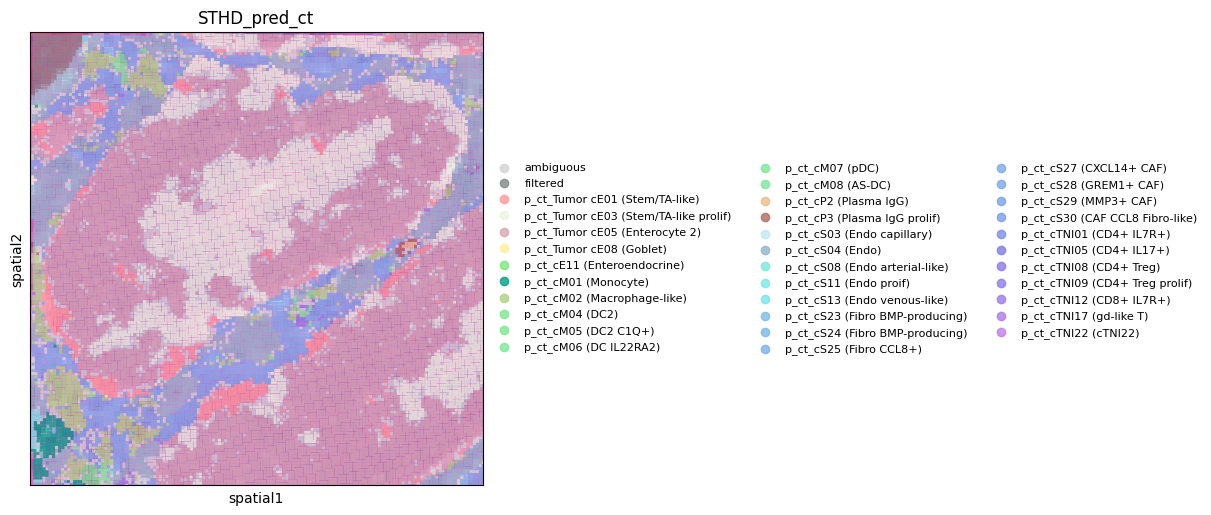

In [6]:
cmap = color_palette.get_config_colormap( name = 'colormap_coloncatlas_98')
data_palette = color_palette.prepare_palette(cmap, sthdata.adata)

coord = sthdata.get_sequencing_data_region()

sq.pl.spatial_scatter(sthdata.adata, 
                      color='STHD_pred_ct', 
                      crop_coord = [coord],
                      legend_fontsize=8,
                      palette = data_palette,
                      figsize=(12,12),
                      size = 1,
                      shape = 'square',
                      alpha = 0.8
                     )

/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


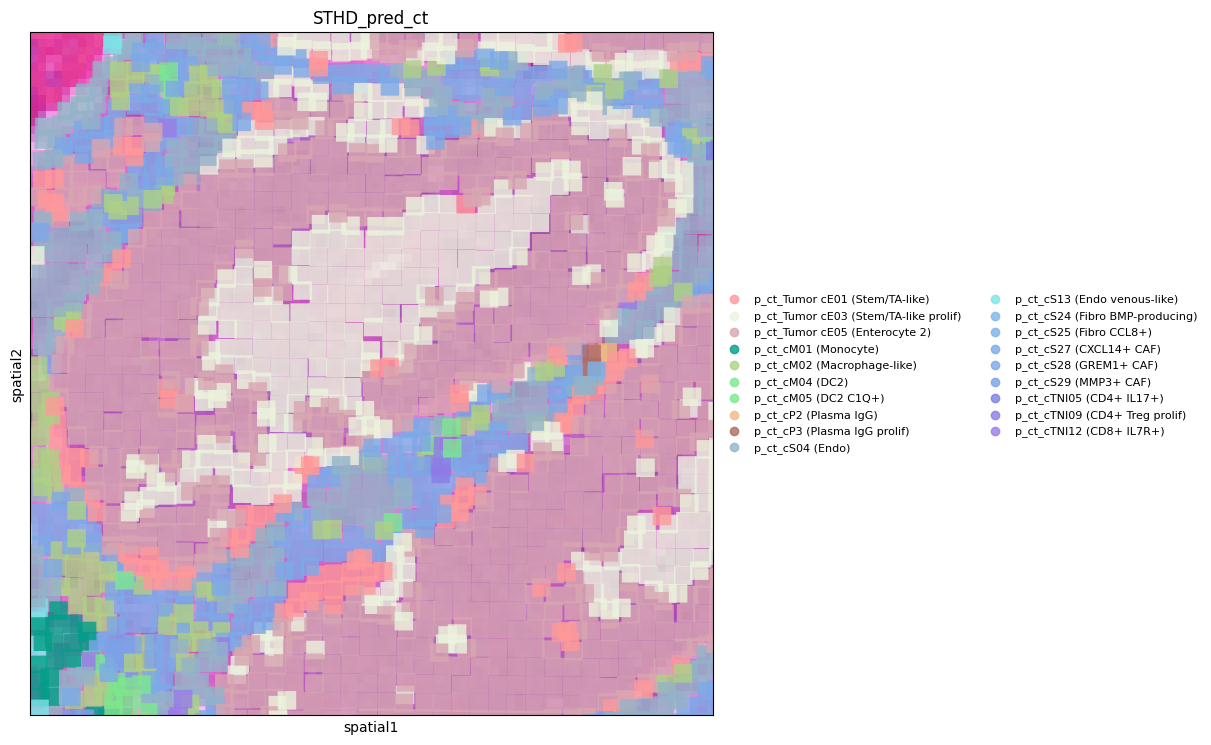

In [7]:
cmap = color_palette.get_config_colormap( name = 'colormap_coloncatlas_98')
data_palette = color_palette.prepare_palette(cmap, binadata)

coord = sthdata.get_sequencing_data_region()

sq.pl.spatial_scatter(binadata, 
                      color='STHD_pred_ct', 
                      crop_coord = [coord],
                      legend_fontsize=8,
                      palette = data_palette,
                      figsize=(12,12),
                      size = 4,
                      shape = 'square',
                      alpha = 0.8
                     )

In [ ]:
cmap = color_palette.get_config_colormap( name = 'colormap_coloncatlas_98')
data_palette = color_palette.prepare_palette(cmap, binadata8)

coord = sthdata.get_sequencing_data_region()

sq.pl.spatial_scatter(binadata8, 
                      color='STHD_pred_ct', 
                      crop_coord = [coord],
                      legend_fontsize=8,
                      palette = data_palette,
                      figsize=(12,12),
                      size = 8,
                      shape = 'square',
                      alpha = 0.8
                     )

/hpc/group/yizhanglab/yiz/venv/stvit-cpu/lib64/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
